<a href="https://colab.research.google.com/github/chizhenn/DS-ML-Projects/blob/main/Analysing_UFOs_Through_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project will cover the steps to process a dataset and perform data wrangling tasks using the Pandas library in Python

#**Step 1: Data Loading**
Download the dataset from Kaggle onto your local drive. Load the dataset into a Pandas
DataFrame. The dataset must be in CSV format.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
#import library

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ufo.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- This command load csv onto the dataframe as df.
- Source: https://www.kaggle.com/datasets/willianoliveiragibin/ufo-sightings

#**Step 2: Initial Data Exploration**
Display the first 5 rows of the dataset to get an initial sense of the data. You may use the info()
and describe() functions to gather basic information about the dataset, such as data types,
missing values, and summary statistics (e.g., min, max, mean, std deviation, and quartiles).

In [ ]:
df.head(5)

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [ ]:
df.tail(5)

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
80323,80323,2013-09-09 21:15:00,9/30/2013,2013,9,21,Autumn,USA,United States,Tennessee,Nashville,36.165833,-86.784444,Light,600.0,10 minutes,Round from the distance/slowly changing colors...
80324,80324,2013-09-09 22:00:00,9/30/2013,2013,9,22,Autumn,USA,United States,Idaho,Boise,43.613611,-116.202500,Circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...
80325,80325,2013-09-09 22:00:00,9/30/2013,2013,9,22,Autumn,USA,United States,California,Napa Abajo,38.297222,-122.284444,Other,1200.0,hour,Napa UFO&#44
80326,80326,2013-09-09 22:20:00,9/30/2013,2013,9,22,Autumn,USA,United States,Virginia,Vienna,38.901111,-77.265556,Circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...
80327,80327,2013-09-09 23:00:00,9/30/2013,2013,9,23,Autumn,USA,United States,Oklahoma,Edmond,35.652778,-97.477778,Cigar,1020.0,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80328 entries, 0 to 80327
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   80328 non-null  int64  
 1   Date_time                    80328 non-null  object 
 2   date_documented              80328 non-null  object 
 3   Year                         80328 non-null  int64  
 4   Month                        80328 non-null  int64  
 5   Hour                         80328 non-null  int64  
 6   Season                       80328 non-null  object 
 7   Country_Code                 80069 non-null  object 
 8   Country                      80069 non-null  object 
 9   Region                       79762 non-null  object 
 10  Locale                       79871 non-null  object 
 11  latitude                     80328 non-null  float64
 12  longitude                    80328 non-null  float64
 13  UFO_shape       

- The dataset consists of object, int, float as the datatypes.
- Most of the colums consist of 'object' datatypes.
- There are several columns contain missing values, such as 'Country_Code', 'Country', 'Region', 'Locale', 'UFO_shape', 'Description'
- **Total rows**: 80328
- **Total columns**: 17

In [ ]:
df.describe()

,Unnamed: 0,Year,Month,Hour,latitude,longitude,length_of_encounter_seconds
count,80328.000000,80328.000000,80328.000000,80328.000000,80328.000000,80328.000000,8.032800e+04
mean,40163.500000,2003.850463,6.835026,15.525172,38.124963,-86.772015,9.017336e+03
std,23188.840549,10.426547,3.234876,7.753750,10.469146,39.697805,6.202322e+05
min,0.000000,1906.000000,1.000000,0.000000,-82.862752,-176.658056,1.000000e-03
25%,20081.750000,2001.000000,4.000000,10.000000,34.134722,-112.073333,3.000000e+01
50%,40163.500000,2006.000000,7.000000,19.000000,39.412500,-87.903611,1.800000e+02
75%,60245.250000,2011.000000,9.000000,21.000000,42.788333,-78.755000,6.000000e+02
max,80327.000000,2014.000000,12.000000,23.000000,72.700000,178.441900,9.783600e+07


In [ ]:
#summary statistics
summary_stats = df.describe()
print(summary_stats)

         Unnamed: 0          Year         Month          Hour      latitude  \
count  80328.000000  80328.000000  80328.000000  80328.000000  80328.000000   
mean   40163.500000   2003.850463      6.835026     15.525172     38.124963   
std    23188.840549     10.426547      3.234876      7.753750     10.469146   
min        0.000000   1906.000000      1.000000      0.000000    -82.862752   
25%    20081.750000   2001.000000      4.000000     10.000000     34.134722   
50%    40163.500000   2006.000000      7.000000     19.000000     39.412500   
75%    60245.250000   2011.000000      9.000000     21.000000     42.788333   
max    80327.000000   2014.000000     12.000000     23.000000     72.700000   

          longitude  length_of_encounter_seconds  
count  80328.000000                 8.032800e+04  
mean     -86.772015                 9.017336e+03  
std       39.697805                 6.202322e+05  
min     -176.658056                 1.000000e-03  
25%     -112.073333              

#**Step 3: Data Cleaning**
Handle missing values using appropriate Panda codes: If there are missing values in the
dataset, decide on a strategy to deal with them (e.g., fill with a specific value or drop rows row
columns). Check for and handle duplicate entries if they exist.

In [ ]:
#display number of missing values
print('--Columns and the number of missing values--')
df.isna().sum()

--Columns and the number of missing values--


Unnamed: 0                        0
Date_time                         0
date_documented                   0
Year                              0
Month                             0
Hour                              0
Season                            0
Country_Code                    259
Country                         259
Region                          566
Locale                          457
latitude                          0
longitude                         0
UFO_shape                      1930
length_of_encounter_seconds       0
Encounter_Duration                0
Description                      15
dtype: int64

In [ ]:
df.isna()

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80323,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
80324,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
80325,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
80326,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


- false = Not NUN Values
- true = NUN Values

**Dropping columns with too many missing values**

In [ ]:
df=df.drop(columns=['UFO_shape'])
print('--Columns and the number of missing values--')
df.isna().sum()

--Columns and the number of missing values--


Unnamed: 0                       0
Date_time                        0
date_documented                  0
Year                             0
Month                            0
Hour                             0
Season                           0
Country_Code                   259
Country                        259
Region                         566
Locale                         457
latitude                         0
longitude                        0
length_of_encounter_seconds      0
Encounter_Duration               0
Description                     15
dtype: int64

**Dropping rows with missing values**

(will drop rows that has even 1 missing values)

In [ ]:
df=df.dropna()
print('--Columns and the number of missing values--')
df.isna().sum()

--Columns and the number of missing values--


Unnamed: 0                     0
Date_time                      0
date_documented                0
Year                           0
Month                          0
Hour                           0
Season                         0
Country_Code                   0
Country                        0
Region                         0
Locale                         0
latitude                       0
longitude                      0
length_of_encounter_seconds    0
Encounter_Duration             0
Description                    0
dtype: int64

**Check for duplicate entries**

In [ ]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f'Number of duplicates: {num_duplicates}')

Number of duplicates: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79574 entries, 0 to 80327
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79574 non-null  int64  
 1   Date_time                    79574 non-null  object 
 2   date_documented              79574 non-null  object 
 3   Year                         79574 non-null  int64  
 4   Month                        79574 non-null  int64  
 5   Hour                         79574 non-null  int64  
 6   Season                       79574 non-null  object 
 7   Country_Code                 79574 non-null  object 
 8   Country                      79574 non-null  object 
 9   Region                       79574 non-null  object 
 10  Locale                       79574 non-null  object 
 11  latitude                     79574 non-null  float64
 12  longitude                    79574 non-null  float64
 13  length_of_encoun

After cleaning:
- There are no columns whith missing values
- **Remaining total rows**: 79574
- **Remaining total columns**: 16

#**Step 4: Data Selection and Filtering**
Select a subset of the data based on a specific condition (e.g., select rows where a particular column meets a certain criteria). Filter the data to include only the columns that are relevant to your analysis. You may use regex().


In [ ]:
#filter the dataset
df=df[df['length_of_encounter_seconds']>7000]
df.head()

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,length_of_encounter_seconds,Encounter_Duration,Description
1,1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
68,68,1997-10-10 16:00:00,1/28/1999,1997,10,16,Autumn,USA,United States,Indiana,Connersville,39.641111,-85.141111,14400.0,4 hours,3 differants types &#44 cluster &#44delta &#44...
80,80,1998-10-10 22:30:00,12/2/2000,1998,10,22,Autumn,CAN,Canada,Newfoundland and Labrador,Blackhead,47.550000,-52.666667,7200.0,2 hours,Started off as 3 points of intense yellow ligh...
88,88,1999-10-10 21:00:00,5/24/2005,1999,10,21,Autumn,USA,United States,Nevada,Rachel,37.644722,-115.742778,10800.0,3 hours,Bright lights with incredible agility seen fro...
122,122,2003-10-10 20:25:00,10/31/2003,2003,10,20,Autumn,USA,United States,Michigan,Temperance,41.779167,-83.568889,18000.0,over 5 hours,pulsating green white and red object in the no...


- Encounter seconds less than approximately 2 hours has been eliminated



**Use regex to select columns that are relevant to my analysis**

In [ ]:
df = df.filter(regex='^(Unnamed: 0|Date_time|date_documented|Year|Month|Hour|Season|Country|Region|Locale|length_of_encounter_seconds)$')

print("Filtered data with relevant columns:")
df.head()


Filtered data with relevant columns:


,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country,Region,Locale,length_of_encounter_seconds
1,1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,United States,Texas,Bexar County,7200.0
68,68,1997-10-10 16:00:00,1/28/1999,1997,10,16,Autumn,United States,Indiana,Connersville,14400.0
80,80,1998-10-10 22:30:00,12/2/2000,1998,10,22,Autumn,Canada,Newfoundland and Labrador,Blackhead,7200.0
88,88,1999-10-10 21:00:00,5/24/2005,1999,10,21,Autumn,United States,Nevada,Rachel,10800.0
122,122,2003-10-10 20:25:00,10/31/2003,2003,10,20,Autumn,United States,Michigan,Temperance,18000.0


- The filtered data with relevant columns is displayed

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2703 entries, 1 to 80298
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   2703 non-null   int64  
 1   Date_time                    2703 non-null   object 
 2   date_documented              2703 non-null   object 
 3   Year                         2703 non-null   int64  
 4   Month                        2703 non-null   int64  
 5   Hour                         2703 non-null   int64  
 6   Season                       2703 non-null   object 
 7   Country                      2703 non-null   object 
 8   Region                       2703 non-null   object 
 9   Locale                       2703 non-null   object 
 10  length_of_encounter_seconds  2703 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 253.4+ KB


After selecting and filtering:
- **Remaining total rows**: 2703
- **Remaining total columns**: 11

#**Step 5: Data Transformation**
Create a new column that combines information from one existing column. Suppose you want to
create a new column that combines a date (in datetime format) that combines one existing
column, for e.g. total revenue of the day.

In [ ]:
df['date_documented'] = pd.to_datetime(df['date_documented'])

def combine_date_info(row):
    return f"Combined_{row['date_documented'].year}_{row['date_documented'].month}_{row['date_documented'].day}"

df['combined_date'] = df.apply(combine_date_info, axis=1)

df.head()

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country,Region,Locale,length_of_encounter_seconds,combined_date
1,1,1949-10-10 21:00:00,2005-12-16,1949,10,21,Autumn,United States,Texas,Bexar County,7200.0,Combined_2005_12_16
68,68,1997-10-10 16:00:00,1999-01-28,1997,10,16,Autumn,United States,Indiana,Connersville,14400.0,Combined_1999_1_28
80,80,1998-10-10 22:30:00,2000-12-02,1998,10,22,Autumn,Canada,Newfoundland and Labrador,Blackhead,7200.0,Combined_2000_12_2
88,88,1999-10-10 21:00:00,2005-05-24,1999,10,21,Autumn,United States,Nevada,Rachel,10800.0,Combined_2005_5_24
122,122,2003-10-10 20:25:00,2003-10-31,2003,10,20,Autumn,United States,Michigan,Temperance,18000.0,Combined_2003_10_31


By assuming it's 2023

In [ ]:
current_year = 2023
#create new column 'Year_been_Discovered'
df['Year_been_Discovered'] = current_year - df['Year']
df.head()

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country,Region,Locale,length_of_encounter_seconds,combined_date,Year_been_Discovered
1,1,1949-10-10 21:00:00,2005-12-16,1949,10,21,Autumn,United States,Texas,Bexar County,7200.0,Combined_2005_12_16,74
68,68,1997-10-10 16:00:00,1999-01-28,1997,10,16,Autumn,United States,Indiana,Connersville,14400.0,Combined_1999_1_28,26
80,80,1998-10-10 22:30:00,2000-12-02,1998,10,22,Autumn,Canada,Newfoundland and Labrador,Blackhead,7200.0,Combined_2000_12_2,25
88,88,1999-10-10 21:00:00,2005-05-24,1999,10,21,Autumn,United States,Nevada,Rachel,10800.0,Combined_2005_5_24,24
122,122,2003-10-10 20:25:00,2003-10-31,2003,10,20,Autumn,United States,Michigan,Temperance,18000.0,Combined_2003_10_31,20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2703 entries, 1 to 80298
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   2703 non-null   int64         
 1   Date_time                    2703 non-null   object        
 2   date_documented              2703 non-null   datetime64[ns]
 3   Year                         2703 non-null   int64         
 4   Month                        2703 non-null   int64         
 5   Hour                         2703 non-null   int64         
 6   Season                       2703 non-null   object        
 7   Country                      2703 non-null   object        
 8   Region                       2703 non-null   object        
 9   Locale                       2703 non-null   object        
 10  length_of_encounter_seconds  2703 non-null   float64       
 11  combined_date                2703 non-null

- 2 new columns are added

**Min-max normalization**

Before min-max normalization

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'date_documented'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'length_of_encounter_seconds'}>],
       [<Axes: title={'center': 'Year_been_Discovered'}>, <Axes: >,
        <Axes: >]], dtype=object)

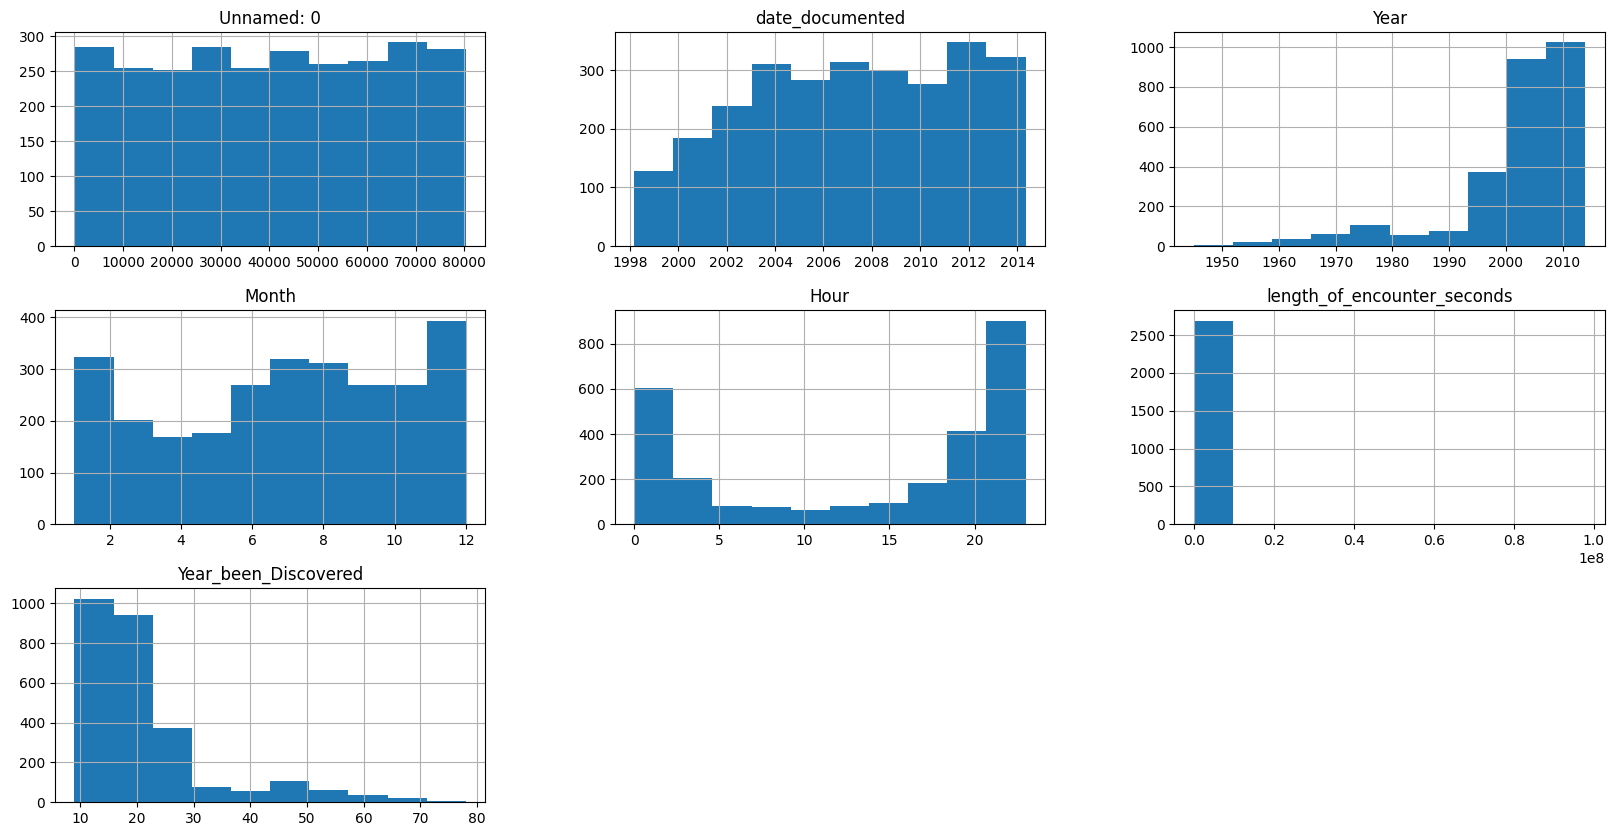

In [ ]:
df. hist (figsize=(20,10))

Apply normalization techniques

In [ ]:
from sklearn import preprocessing
m=preprocessing.MinMaxScaler(feature_range=(0, 1))

df_norm_min_max = df.copy ()

df_norm_min_max[['Year','Month','Hour']]=m.fit_transform(df_norm_min_max[['Year','Month','Hour']])


After min-max normalization


In [ ]:
df_norm_min_max.head()

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country,Region,Locale,length_of_encounter_seconds,combined_date,Year_been_Discovered
1,1,1949-10-10 21:00:00,2005-12-16,0.057971,0.818182,0.913043,Autumn,United States,Texas,Bexar County,7200.0,Combined_2005_12_16,74
68,68,1997-10-10 16:00:00,1999-01-28,0.753623,0.818182,0.695652,Autumn,United States,Indiana,Connersville,14400.0,Combined_1999_1_28,26
80,80,1998-10-10 22:30:00,2000-12-02,0.768116,0.818182,0.956522,Autumn,Canada,Newfoundland and Labrador,Blackhead,7200.0,Combined_2000_12_2,25
88,88,1999-10-10 21:00:00,2005-05-24,0.782609,0.818182,0.913043,Autumn,United States,Nevada,Rachel,10800.0,Combined_2005_5_24,24
122,122,2003-10-10 20:25:00,2003-10-31,0.840580,0.818182,0.869565,Autumn,United States,Michigan,Temperance,18000.0,Combined_2003_10_31,20


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'date_documented'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'length_of_encounter_seconds'}>],
       [<Axes: title={'center': 'Year_been_Discovered'}>, <Axes: >,
        <Axes: >]], dtype=object)

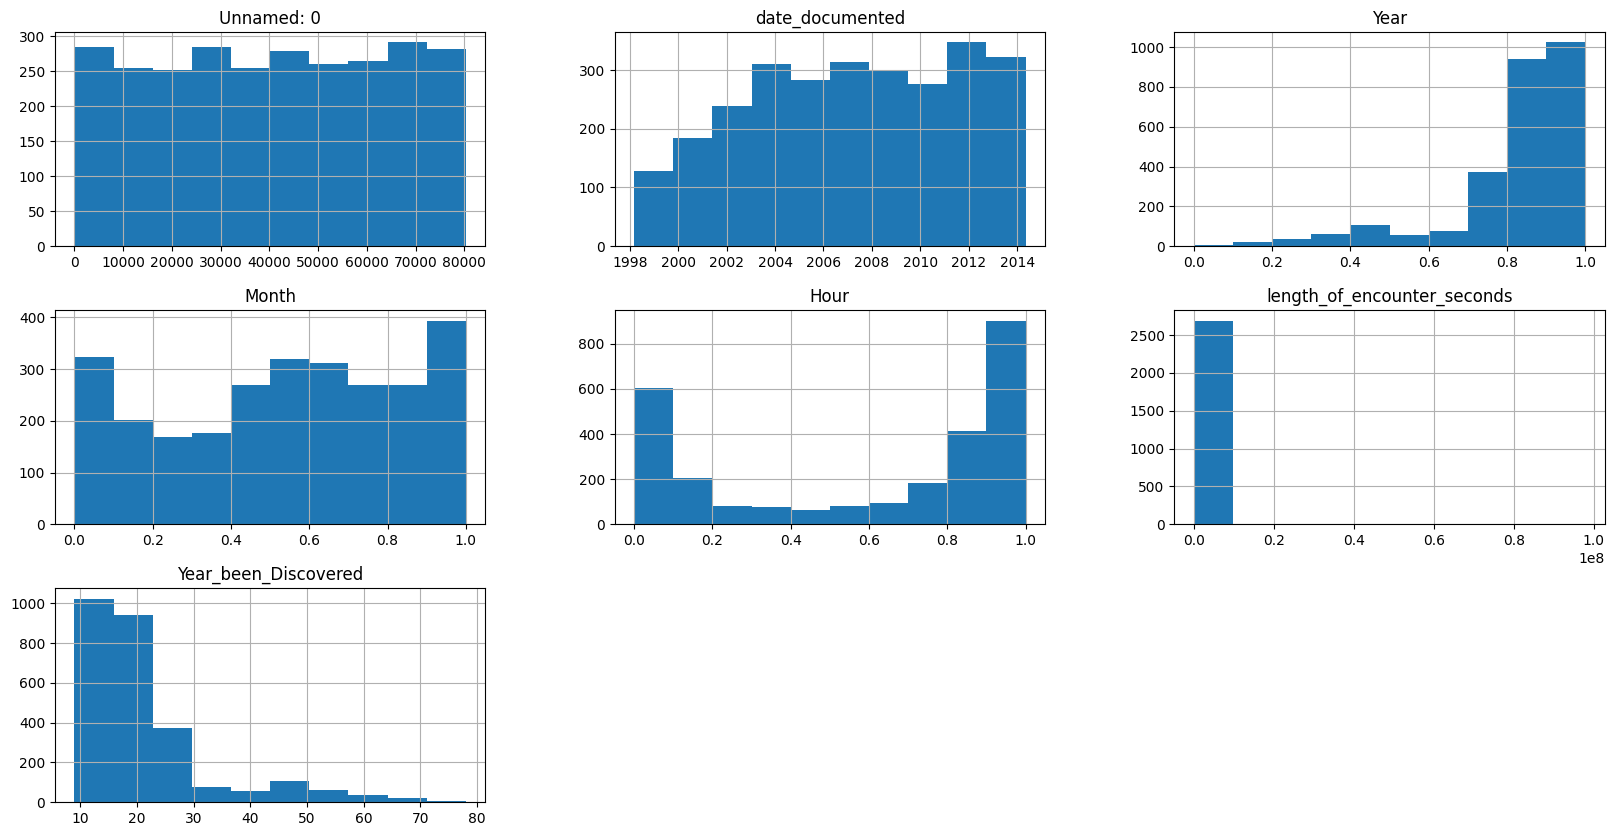

In [ ]:
df_norm_min_max.hist(figsize=(20,10))

**Z-score normalization**

Apply normalization techniques

In [ ]:
m=preprocessing.StandardScaler()
df_norm_std_scaler = df.copy()
df_norm_std_scaler[['Year','Month','Hour']]=m.fit_transform(df_norm_std_scaler[['Year','Month','Hour']])

After min-max normalization

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'date_documented'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'length_of_encounter_seconds'}>],
       [<Axes: title={'center': 'Year_been_Discovered'}>, <Axes: >,
        <Axes: >]], dtype=object)

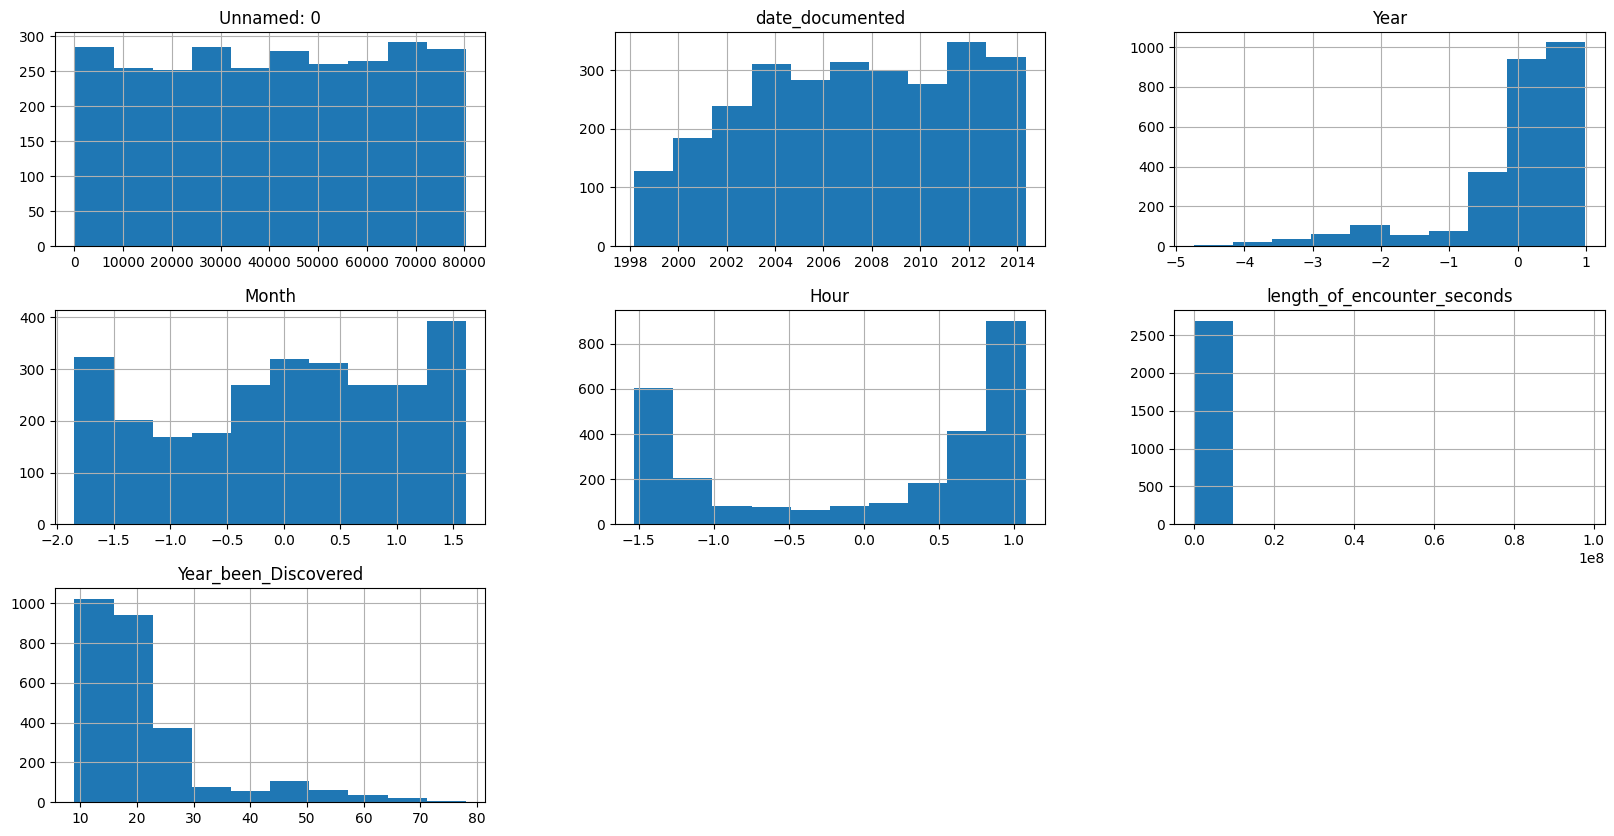

In [ ]:
df_norm_std_scaler .hist(figsize=(20,10))

#**Step 6: Data Aggregation**
Group the data by a particular column and calculate summary statistics (e.g., mean, sum) for
other columns within each group. For example, by grouping using groupby() the data by month
and calculating the total revenue for each month.

**Aggregation**

• aggregate

• groupby

• aggregate and groupby

• sort

In [ ]:
df.head()

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country,Region,Locale,length_of_encounter_seconds,combined_date,Year_been_Discovered
1,1,1949-10-10 21:00:00,2005-12-16,1949,10,21,Autumn,United States,Texas,Bexar County,7200.0,Combined_2005_12_16,74
68,68,1997-10-10 16:00:00,1999-01-28,1997,10,16,Autumn,United States,Indiana,Connersville,14400.0,Combined_1999_1_28,26
80,80,1998-10-10 22:30:00,2000-12-02,1998,10,22,Autumn,Canada,Newfoundland and Labrador,Blackhead,7200.0,Combined_2000_12_2,25
88,88,1999-10-10 21:00:00,2005-05-24,1999,10,21,Autumn,United States,Nevada,Rachel,10800.0,Combined_2005_5_24,24
122,122,2003-10-10 20:25:00,2003-10-31,2003,10,20,Autumn,United States,Michigan,Temperance,18000.0,Combined_2003_10_31,20


In [ ]:
df .agg(['min'])


,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country,Region,Locale,length_of_encounter_seconds,combined_date,Year_been_Discovered
min,1,1945-07-15 14:00:00,1998-03-07,1945,1,0,Autumn,Argentina,Al-Anbar Governorate,(Old) Ottawa,7080.0,Combined_1998_11_1,9


In [ ]:
df.describe()

,Unnamed: 0,Year,Month,Hour,length_of_encounter_seconds,Year_been_Discovered
count,2703.000000,2703.000000,2703.000000,2703.000000,2.703000e+03,2703.000000
mean,40524.339623,2002.053274,6.877913,13.499445,2.501487e+05,20.946726
std,23390.331954,12.037419,3.182909,8.819133,3.371058e+06,12.037419
min,1.000000,1945.000000,1.000000,0.000000,7.080000e+03,9.000000
25%,20672.000000,2000.000000,4.000000,3.000000,7.200000e+03,13.000000
50%,40969.000000,2005.000000,7.000000,18.000000,1.080000e+04,18.000000
75%,60735.500000,2010.000000,9.000000,21.000000,1.440000e+04,23.000000
max,80298.000000,2014.000000,12.000000,23.000000,9.783600e+07,78.000000


- Let's say I want to groupby locale. Different locales should have different hour when UFO appears.
- Use groupby to group the data by 'Locale'

In [ ]:
grouped_df = df.groupby('Locale')

for i, (locale, group) in enumerate(grouped_df, start=1):
    print(f'{i}: {locale}')

In [ ]:
df_by_locale = df.groupby('Locale').aggregate('mean')

<ipython-input-122-173455f5dc4f>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
columns_to_drop = ['Unnamed: 0', 'length_of_encounter_seconds', 'Year_been_Discovered']
df_by_locale = df_by_locale.drop(columns=columns_to_drop)

In [ ]:
df_by_locale.sample(5)

,Year,Month,Hour
Locale,,,
Springfield,2005.4,8.4,16.0
Cold Springs,1966.0,7.0,22.0
Delaware Gardens,1999.0,6.0,21.0
Chippenham,2005.0,7.0,10.0
Milford,1978.0,8.5,14.0


<Axes: xlabel='Locale'>

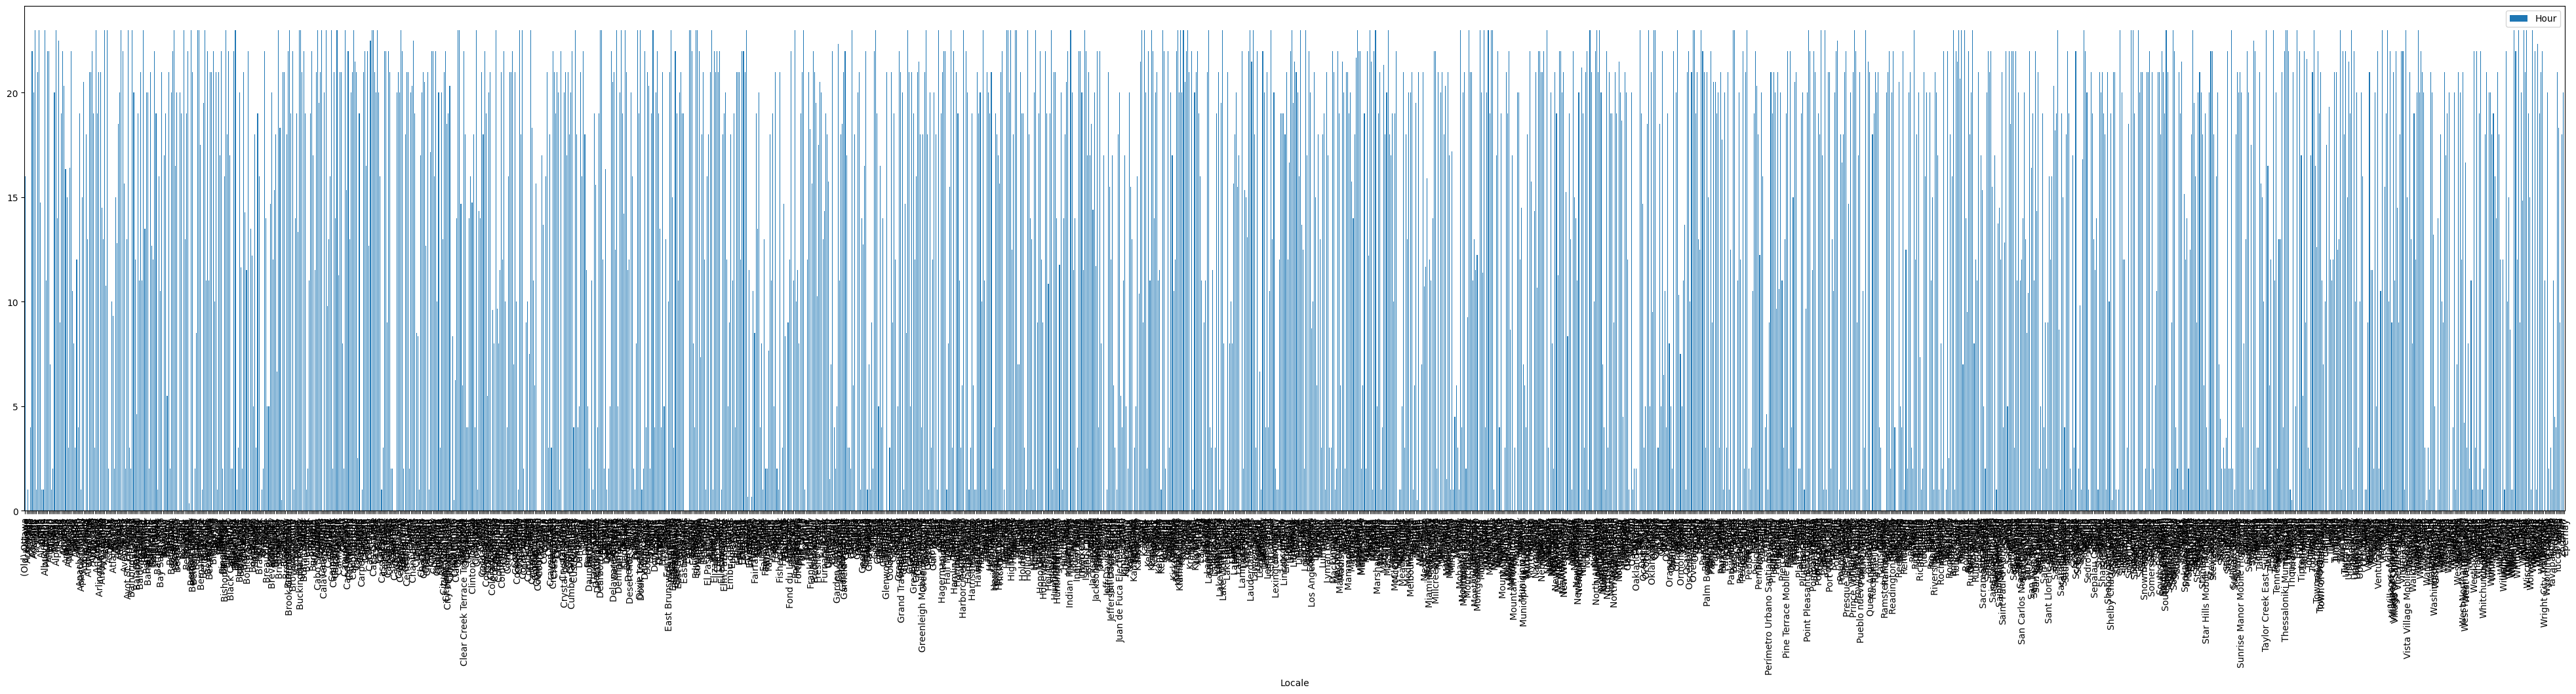

In [ ]:
df_by_locale.plot.bar(y= 'Hour' ,figsize=(50,10),use_index=True,rot=90)
#display graph

Find UFO sightings at noon in each locale

In [ ]:
df_by_locale = df_by_locale[(df_by_locale['Hour'] >= 11) & (df_by_locale['Hour'] <= 13)]
df_by_locale.info()


<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, Albuquerque to Yavapai County
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    147 non-null    float64
 1   Month   147 non-null    float64
 2   Hour    147 non-null    float64
dtypes: float64(3)
memory usage: 4.6+ KB


<Axes: xlabel='Locale'>

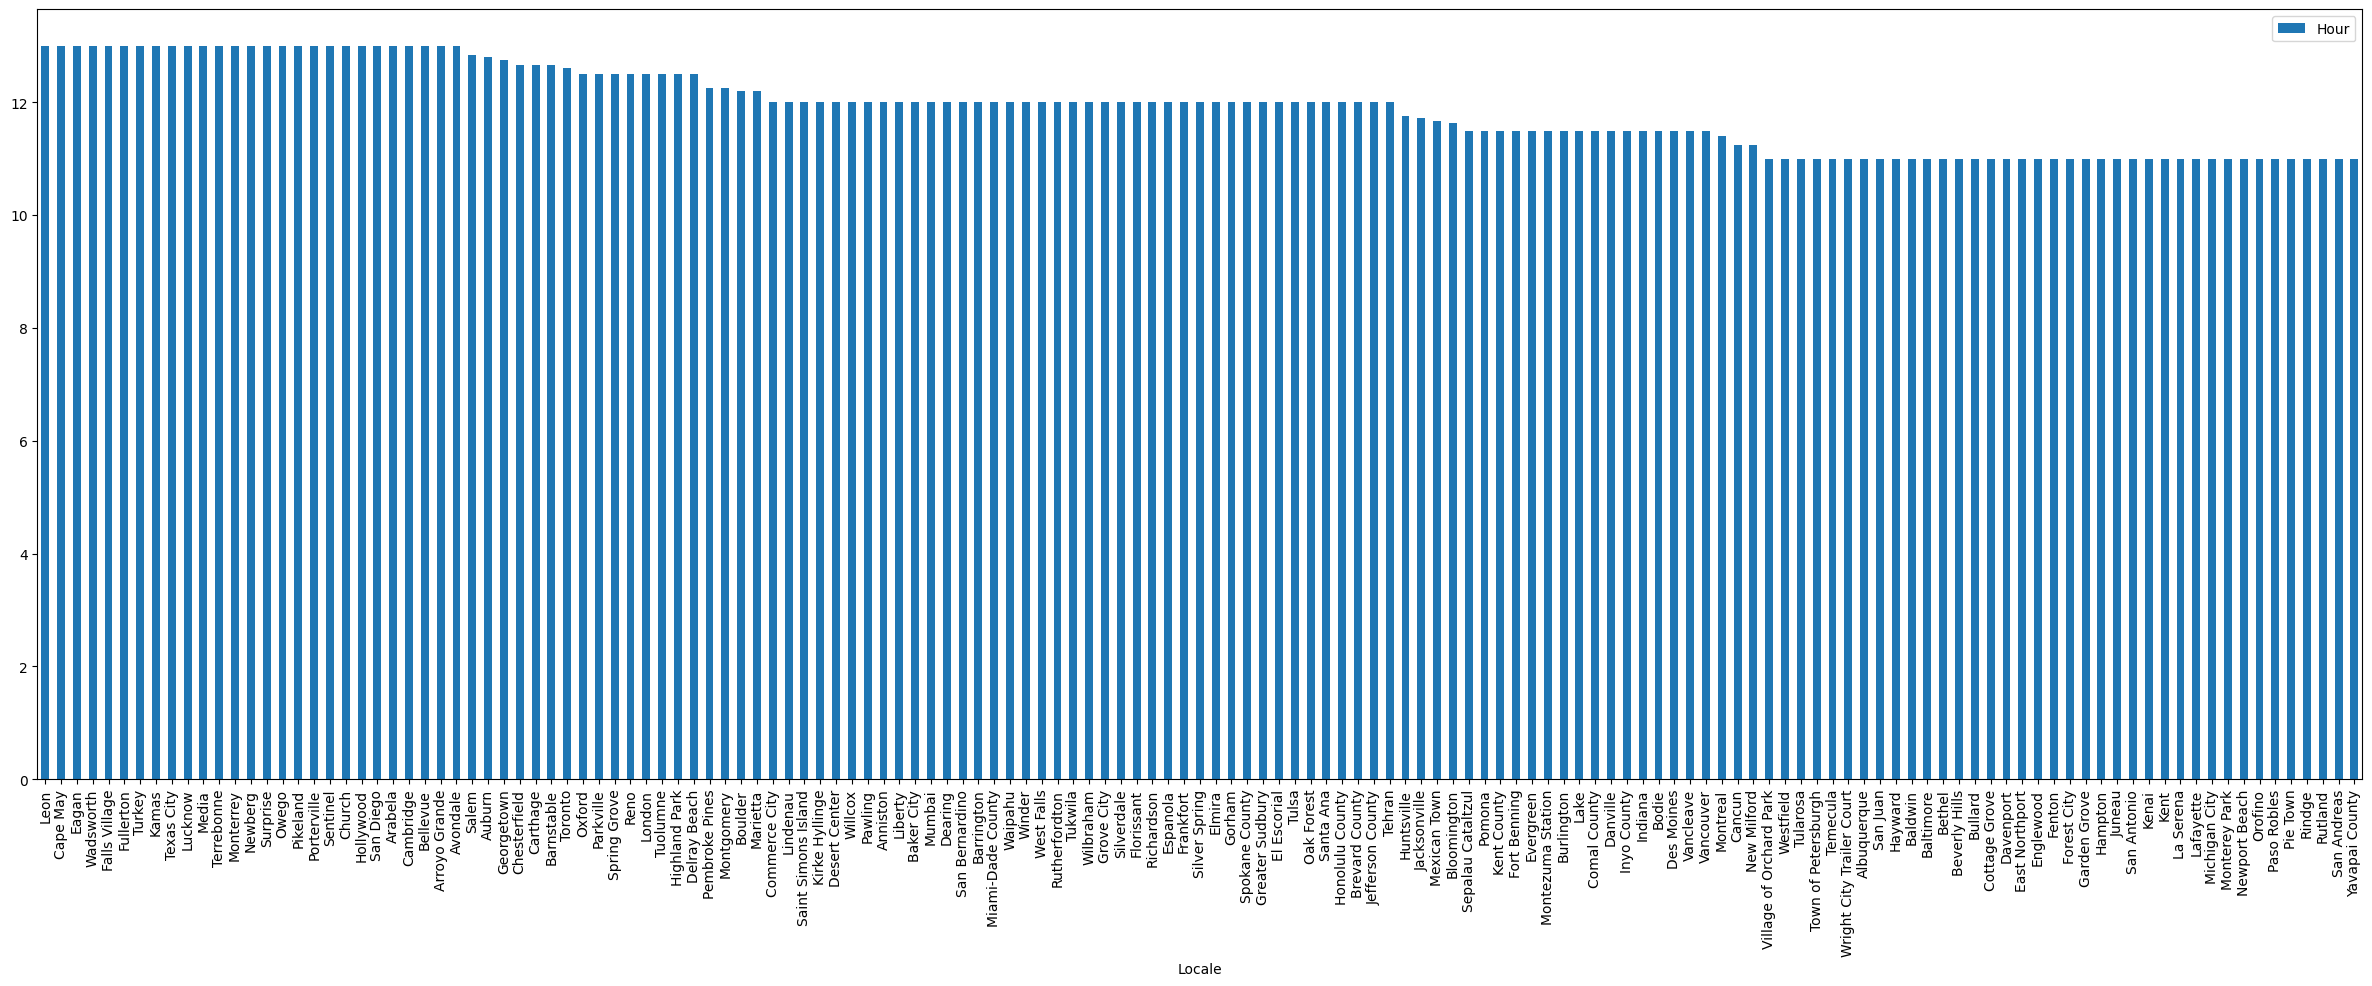

In [ ]:
df_by_locale = df_by_locale.sort_values(by='Hour',ascending=False)
df_by_locale.plot.bar(y='Hour',figsize=(30,10),use_index=True, rot=90)

#**Step 7: Data Visualization**
Create at least two data visualizations using Matplotlib or Seaborn to illustrate trends or insights
in the data (e.g., bar chart, scatter plot, histogram).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2703 entries, 1 to 80298
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   2703 non-null   int64         
 1   Date_time                    2703 non-null   object        
 2   date_documented              2703 non-null   datetime64[ns]
 3   Year                         2703 non-null   int64         
 4   Month                        2703 non-null   int64         
 5   Hour                         2703 non-null   int64         
 6   Season                       2703 non-null   object        
 7   Country                      2703 non-null   object        
 8   Region                       2703 non-null   object        
 9   Locale                       2703 non-null   object        
 10  length_of_encounter_seconds  2703 non-null   float64       
 11  combined_date                2703 non-null

**Plot histogram with number of UFO sightings per year**

In [ ]:
fig = px.histogram(df,x="Year",title="Number of UFO sightings per year", color="Year")

# Update the layout
fig.update_layout(bargap=0.2)

fig.show()

**Plot pie chart with distribution of UFO sightings in selected countries**

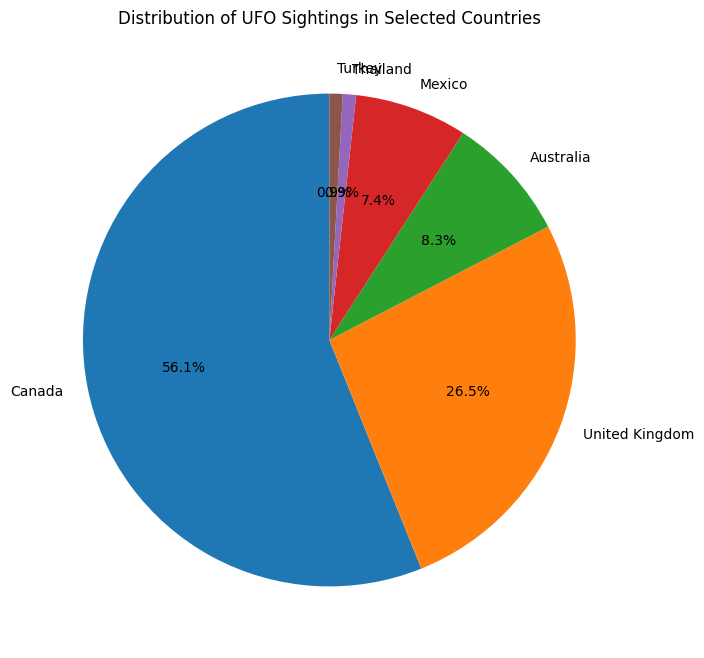

In [ ]:
selected_countries = ['Australia','Canada','Mexico','Turkey','United Kingdom','Thailand']

filtered_df = df[df['Country'].isin(selected_countries)]

country_counts = filtered_df['Country'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of UFO Sightings in Selected Countries')
plt.show()

**Plot bar chart with region with the most UFO occurrences**

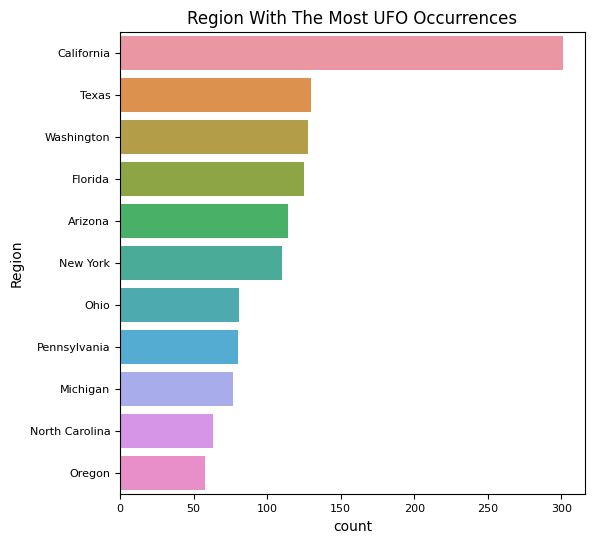

In [ ]:
plt.figure(figsize=(6,6))
y = sns.countplot(y='Region',
            data=df, order =df['Region'].value_counts().index[:11])

plt.tick_params(labelsize=8)
plt.title("Region With The Most UFO Occurrences")
plt.show()

**Plot scatter plot with region with UFO sightings over the years**

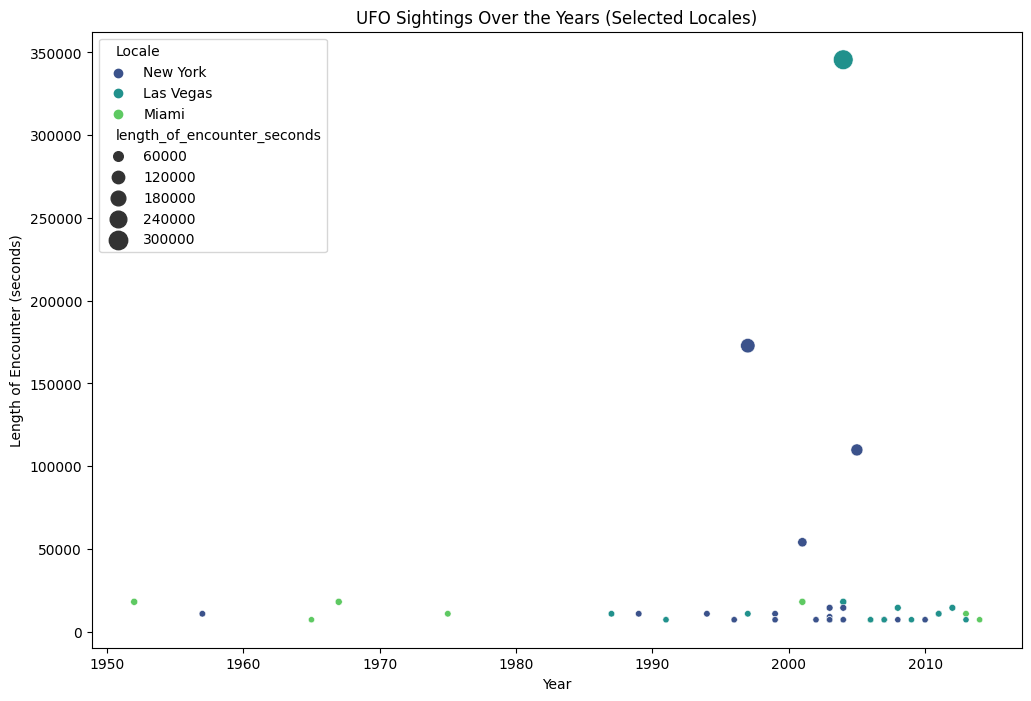

In [ ]:
selected_locales = ['New York', 'Las Vegas', 'Miami']

filtered_df = df[df['Locale'].isin(selected_locales)]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_df, x='Year', y='length_of_encounter_seconds', hue='Locale', palette='viridis', size='length_of_encounter_seconds', sizes=(20, 200))
plt.title('UFO Sightings Over the Years (Selected Locales)')
plt.xlabel('Year')
plt.ylabel('Length of Encounter (seconds)')
plt.show()

# **Step 8: Data Export**
Save the cleaned and transformed dataset to a CSV file for future analysis.

In [ ]:
df.to_csv("ufo.csv", index=False)
#done

#**Step 9: Documentation**
Provide comments and explanations in your code cells to describe the steps you've taken by
using the markdown feature in Jupiter.

In [ ]:
#Done

#**Step 10: Conclusion**
Summarize your findings, insights, and trends from the data wrangling process. Explain how the dataset can be laveraged for decision-making making. What type of Machine learning problems, e.g. classification / clustering / regression is suitable for the dataset and decision-making.

   

- The data and histogram reveal a **steady increase in UFO sightings over years**. However, **an unexpected drop of approximately 300 counts occurred in the year 2012.** This decline could potentially be linked to changes in reporting methodologies, fluctuations in public interest, alterations in media coverage, or variations in how individuals interpret and report unidentified phenomena. It's important to scrutinize these trends with a scientific approach, considering multiple factors that might influence the perception of UFO sightings.

- The data and pie chart show that **Canada has the most reported UFO sightings among 5 selected countries, making up 56.1% of the other**: 'Australia,' 'Canada,' 'Mexico,' 'Turkey,' 'United Kingdom,' and 'Thailand.' This is particularly noteworthy because **Canada represents North America** in this dataset. The higher number of reported UFO sightings in Canada might be because the country has effective and open reporting systems. They have a well-established system that encourages people to report UFO sightings, creating an open culture that contributes to Canada having more documented UFO sightings compared to the other selected countries.



- The data and bar chart indicate that **California has the most reported UFO sightings among 10 selected regions, making up over 300 UFO occurrences**. One potential reason for this could be the **diverse and dynamic population** in California. The state's large and varied population, along with a culture that values openness and curiosity, might lead to increased awareness of UFO phenomena and a greater willingness among people to report sightings. Moreover, California's active and transparent reporting systems could also boost the number of documented UFO sightings compared to other selected regions.

- The data and scatter plot indicates **the length of UFO encounters** in New York, Las Vegas, and Miami, **influenced by different factors**. How close people think the UFO is, the type of UFO and its actions, how well you can see it, if the witnesses are trustworthy, and psychological factors all matter. If the UFO seems close, does unusual things, is seen clearly, has credible witnesses, or affects people psychologically, the reported encounter time tends to be longer in these places.




- **Observing UFOs during the noon period is unique** because it helps us understand how frequently UFOs typically show up during the day. Between hour 11 and 13, there were approximately 147 UFO sightings, **making up 5.44% of the total**. This suggests that **UFOs are more commonly seen at night**, and during the day, it's more challenging to detect them due to strong sunlight.








- The dataset provides various details on UFO sightings. **Users can check** the specific time and date of each sighting through the "Date_time" and "date_documented" columns. Information on the year, month, and hour of sightings is available in the "Year," "Month," and "Hour" columns, allowing users to see when sightings happen most frequently. The "Season" column categorizes sightings by the time of year. Geographical details are in the "Country," "Region," and "Locale" columns, helping users explore where sightings occur. The "length_of_encounter_seconds" column shows how long UFO sightings last. These help users to **understand temporal variations, geographical disparities, and factors influencing UFO sightings, ultimately contributing to a better comprehension of the observed phenomena.**

#Machine Learning Problem

**Classification** could be a suitable choice for the dataset and decision-making based on the ufo dataset.

It could be implemented to assess the credibility of UFO sightings, taking into account factors such as witness reliability and provided descriptions. For instance, developing a classification model for UFO sightings involves predicting the shape of UFOs by considering factors like sighting time, location, and duration. This model aims to recognize prevalent UFO shapes frequently observed during sightings. Additionally, another classification task involves categorizing sightings into day or night occurrences, providing insights into the favored timeframe for UFO sightings. This classification helps identify patterns based on when UFOs are commonly reported.

#**END**